In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [2]:
df = pd.read_csv('../../lr_bulk/talon/human_talon_abundance.tsv', sep='\t')
filt_df = pd.read_csv('../../lr_bulk/talon/human_talon_abundance_filtered.tsv', sep='\t')

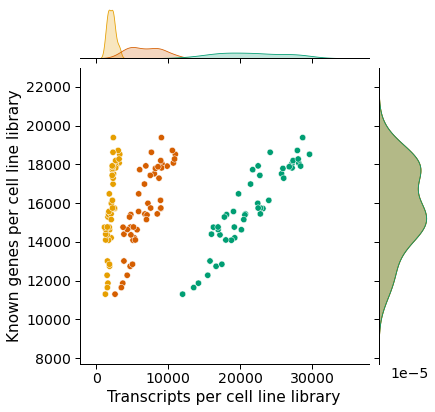

In [3]:
plot_gene_v_iso_det(df, filt_df,
                   sample='cell_line',
                   opref='figures/')

In [3]:
sample ='cell_line'
opref = 'figures'

df = rm_sirv_ercc(df)
filt_df = rm_sirv_ercc(filt_df)
dataset_cols = get_sample_datasets(sample)

# only known genes
gene_df = df.loc[df.gene_novelty == 'Known'].copy(deep=True)
gene_df = gene_df[dataset_cols+['annot_gene_id']]
gene_df = gene_df.groupby('annot_gene_id').sum()

gene_df = gene_df.astype(bool)
ind_cols = gene_df.columns
gene_df = gene_df.transpose()
gene_df['n_genes'] = gene_df.sum(1)
gene_df = gene_df['n_genes'].to_frame()

# known transcripts
t_df = filt_df.loc[filt_df.transcript_novelty == 'Known'].copy(deep=True)
t_df = t_df[dataset_cols+['annot_transcript_id']]
t_df = t_df.astype(bool)
ind_cols = t_df.columns
t_df = t_df.transpose()
t_df['Known'] = t_df.sum(1)
t_df = t_df['Known'].to_frame()

gene_df = gene_df.merge(t_df, left_index=True, right_index=True)

# nic transcripts
t_df = filt_df.loc[filt_df.transcript_novelty == 'NIC'].copy(deep=True)
t_df = t_df[dataset_cols+['annot_transcript_id']]
t_df = t_df.astype(bool)
ind_cols = t_df.columns
t_df = t_df.transpose()
t_df['NIC'] = t_df.sum(1)
t_df = t_df['NIC'].to_frame()

gene_df = gene_df.merge(t_df, left_index=True, right_index=True)

# nnc transcripts
t_df = filt_df.loc[filt_df.transcript_novelty == 'NNC'].copy(deep=True)
t_df = t_df[dataset_cols+['annot_transcript_id']]
t_df = t_df.astype(bool)
ind_cols = t_df.columns
t_df = t_df.transpose()
t_df['NNC'] = t_df.sum(1)
t_df = t_df['NNC'].to_frame()

gene_df = gene_df.merge(t_df, left_index=True, right_index=True)
gene_df.reset_index(inplace=True)


In [4]:
df = gene_df.melt(id_vars=['index', 'n_genes'],
                  value_vars=['Known',
                              'NIC',
                              'NNC'])

In [9]:
df.rename({'value': 'transcript_counts'}, axis=1, inplace=True)
df.rename({'variable': 'novelty'}, axis=1, inplace=True)

In [10]:
df.head()

,index,n_genes,novelty,transcript_counts
0,gm12878_1_1,12741,Known,16648
1,gm12878_1_2,11869,Known,14194
2,gm12878_1_3,11301,Known,11993
3,gm12878_1_4,11641,Known,13536
4,gm12878_3_1,17515,Known,25755


In [11]:
c_dict, order = get_talon_nov_colors(['Known', 'NIC', 'NNC'])

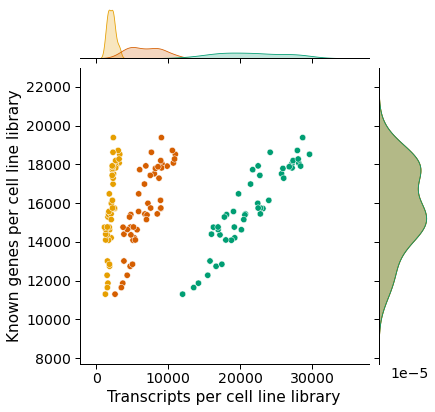

In [15]:
sns.set_context('paper', font_scale=1.6)

ax = sns.jointplot(data=df, x='transcript_counts', y='n_genes',
                 hue='novelty', palette=c_dict,
#                  xlim=(0,xlim), ylim=(0,ylim), 
                 joint_kws={'data':df, 's':40, 'alpha':1})
ax = ax.ax_joint

ax.legend(title='')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_legend().remove()

if sample == 'tissue':
    ylabel = 'Known genes per tissue library'
    xlabel = 'Transcripts per tissue library'
elif sample == 'cell_line':
    ylabel = 'Known genes per cell line library'
    xlabel = 'Transcripts per cell line library'

_ = ax.set(xlabel=xlabel, ylabel=ylabel)

In [ ]:
df = pd.read_csv('../../lr_bulk/talon/human_talon_abundance.tsv', sep='\t')

Found 21 distinct cell lines


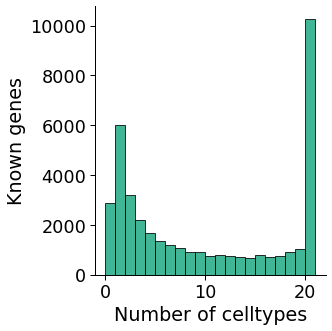

In [3]:
plot_biosamp_det(df, how='gene',
                 sample='cell_line',
                 groupby='cell_line',
                 opref='figures/')

Found 48 distinct libraries


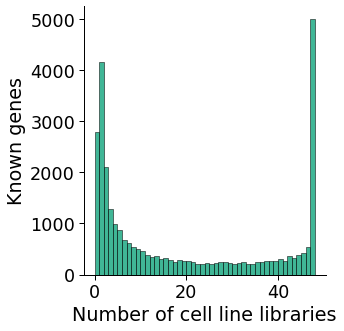

In [10]:
plot_biosamp_det(df, how='gene',
                 sample='cell_line',
                 groupby='library',
                 nov='Known',
                 opref='figures/')

Found 21 distinct cell lines


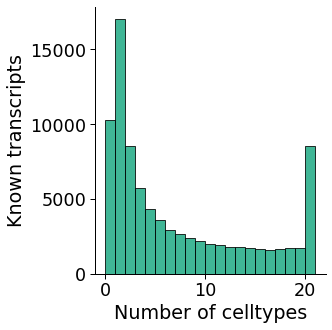

In [11]:
plot_biosamp_det(df, how='iso',
                 sample='cell_line',
                 groupby='cell_line',
                 opref='figures/')

Found 48 distinct libraries


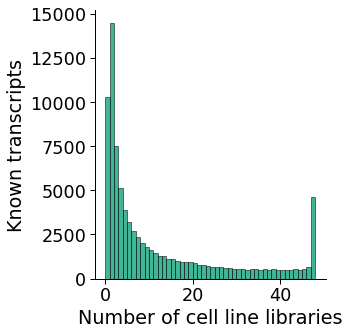

In [12]:
plot_biosamp_det(df, how='iso',
                 sample='cell_line',
                 groupby='library',
                 opref='figures/')

In [5]:
df = pd.read_csv('../../lr_bulk/talon/human_talon_abundance_filtered.tsv', sep='\t')

Found 21 distinct cell lines


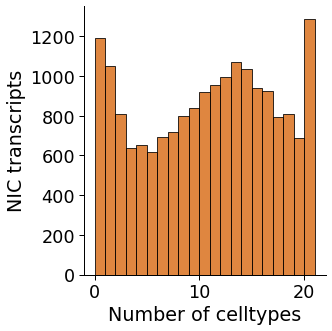

In [6]:
plot_biosamp_det(df, how='iso',
                 sample='cell_line',
                 groupby='cell_line',
                 nov='NIC',
                 opref='figures/')

Found 48 distinct libraries


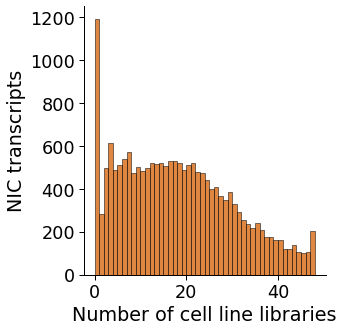

In [7]:
plot_biosamp_det(df, how='iso',
                 sample='cell_line',
                 groupby='library',
                 nov='NIC',
                 opref='figures/')

Found 21 distinct cell lines


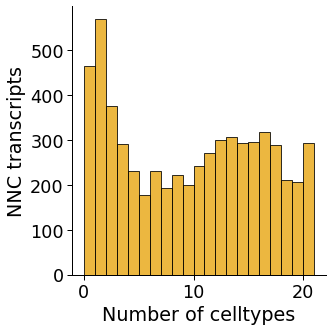

In [8]:
plot_biosamp_det(df, how='iso',
                 sample='cell_line',
                 groupby='cell_line',
                 nov='NNC',
                 opref='figures/')

Found 48 distinct libraries


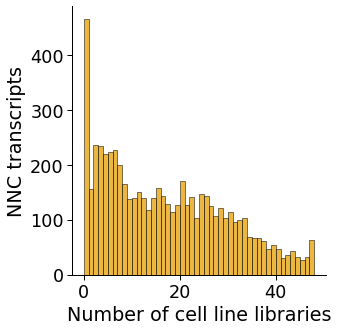

In [9]:
plot_biosamp_det(df, how='iso',
                 sample='cell_line',
                 groupby='library',
                 nov='NNC',
                 opref='figures/')